In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [26]:
df_train=pd.read_csv('https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/loan_train.csv')

In [3]:
df_test=pd.read_csv('https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/loan_test.csv')

In [8]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df_train['Gender'].loc[df_train['Gender'].isnull()]

Series([], Name: Gender, dtype: object)

In [30]:
df_train['Gender']=df_train['Gender'].fillna('Male')

In [33]:
df_train['Self_Employed']=df_train['Self_Employed'].fillna(0)

In [48]:
df_train['Married']=df_train['Married'].fillna('Yes')

In [53]:
df_train['LoanAmount'].loc[df_train['LoanAmount'].isnull()]=df_train['LoanAmount'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9684\1752017229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LoanAmount'].loc[df_train['LoanAmount'].isnull()]=df_train['LoanAmount'].mean()


In [55]:
df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isnull()]=df_train['Loan_Amount_Term'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9684\678522625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isnull()]=df_train['Loan_Amount_Term'].mean()


In [98]:
df_train['Self_Employed'].loc[df_train['Self_Employed'].isnull()]=df_train['Self_Employed'].mode()[0]

C:\Users\user\AppData\Local\Temp\ipykernel_9684\3044735855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Self_Employed'].loc[df_train['Self_Employed'].isnull()]=df_train['Self_Employed'].mode()[0]


In [56]:
df_train['Credit_History'].loc[df_train['Credit_History'].isnull()]=df_train['Credit_History'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9684\1610246567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Credit_History'].loc[df_train['Credit_History'].isnull()]=df_train['Credit_History'].mean()


In [65]:
df_train['Dependents'].loc[df_train['Dependents'].isnull()]=0

C:\Users\user\AppData\Local\Temp\ipykernel_9684\2406566658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Dependents'].loc[df_train['Dependents'].isnull()]=0


In [68]:
df_train.drop(['Loan_ID'],axis=1,inplace=True)

In [81]:
df_train['Dependents'].replace({'3+':'3'},inplace=True)

In [82]:
df_train['Dependents']=pd.to_numeric(df_train['Dependents'])

In [100]:
df_train['Self_Employed'].replace({0:'No'},inplace=True)

In [84]:
lb=LabelEncoder()

In [105]:
df_train['Gender']=lb.fit_transform(df_train['Gender'])
df_train['Married']=lb.fit_transform(df_train['Married'])
df_train['Education']=lb.fit_transform(df_train['Education'])
#df_train['Self_Employed']=lb.fit_transform(df_train['Self_Employed'])
df_train['Property_Area']=lb.fit_transform(df_train['Property_Area'])

In [107]:
df_train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [111]:
X=df_train.drop(['Loan_Status'],axis=1)

In [113]:
y=df_train['Loan_Status']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2549)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr=LogisticRegression()

In [120]:
lr.fit(X_train,y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
lr.score(X_test,y_test)

0.7987012987012987

In [122]:
lr.score(X_train,y_train)

0.8152173913043478

<Axes: >

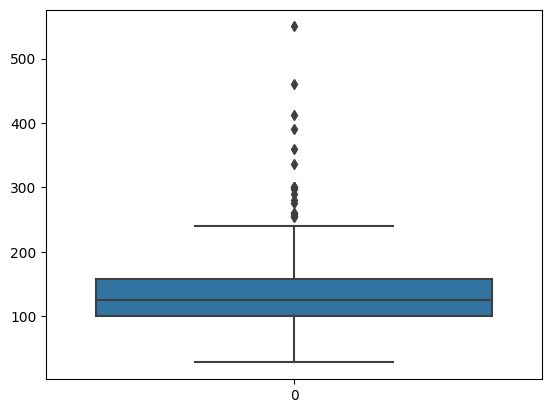

In [127]:
sns.boxplot(df_test['LoanAmount'])

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf=RandomForestClassifier()

In [130]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [131]:
rf.score(X_test,y_test)

0.7207792207792207

In [134]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [133]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [136]:
model=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)